![title](img/GMIT-Galway-Campus.jpg)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

I have saved dataset and I will use the following code to read file and store the data in data frame called df

In [2]:
df=pd.read_csv('imported_datasets/plantgrowth.csv')

This dataset documents the "Results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions." [1] PlantGrowth: Results from an Experiment on Plant Growth, rdrr, https://rdrr.io/r/datasets/PlantGrowth.html

I will use the *.head* & *.tail* to examine first and last 5 rows of data.

In [3]:
df.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [4]:
df.tail(5)

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


By using *.info* I can see there are 3 columns and 30 rows. There are no null values in the dataset.
Weight is a numeric variable representing the weight of the plantsis. Its is a quantitative & continious variable. It is a float64 dtype
Group is a categorical variable with 3 levels, 'ctrl' (control group), 'trt1' (treatment 1), and 'trt2' (treatment 2). It is a qualative variable

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


Nominal and ratio data types are both used to describe categorical variables. The difference between the two data types is that ordinal data has ordered categories and nominal data does not.

Group is Nominal as the categories 'ctrl', 'trt1', and 'trt2' have no inherent order

| weight | group |
| --- | --- |
| numerical | categorical |
| Quantitative | Quantitative |
| continuous | categorical |
| ratio* | nominal |
| float | string | 

*df.describe* displays valuable information about the dataset such as the mean, standard deviation, min & max for each variable.

In [6]:
df.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [24]:
df.dtypes

rownames      int64
weight      float64
group        object
dtype: object

A pairplot displays pairwise relationships between variables in the dataset.In this case, it shows the relationship between weight and group.
The hue parameter colors the points by the group variable, allowing us to see how different groups compare. This helps in visualizing any potential correlations or differences between the groups.

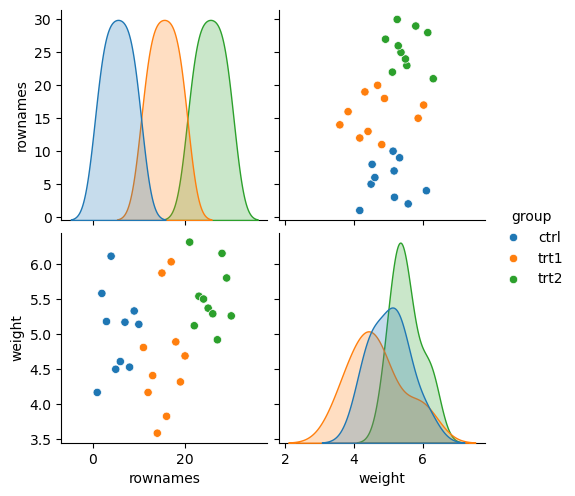

In [25]:
sns.pairplot(df, hue= 'group')
plt.show()

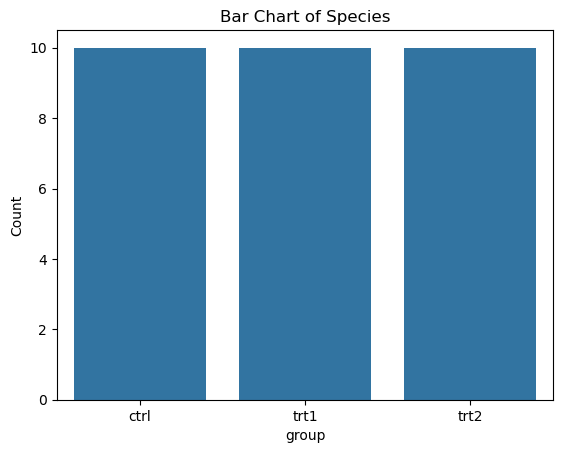

In [26]:
sns.countplot(x='group', data=df)
plt.title('Bar Chart of Species')
plt.xlabel('group')
plt.ylabel('Count')
#plt.legend
plt.show()


C:\Users\irivyo\AppData\Local\Temp\ipykernel_18916\655329774.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


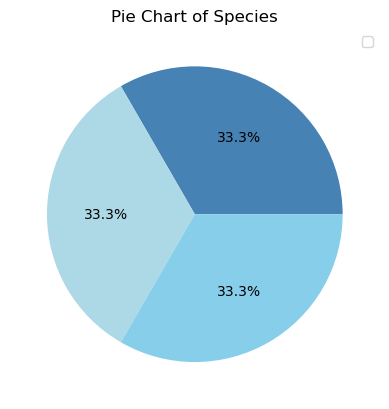

In [35]:
plt.pie(df['group'].value_counts(), colors=['steelblue', 'lightblue', 'skyblue'], autopct='%1.1f%%')
plt.title('Pie Chart of Species')
plt.legend()
plt.show()

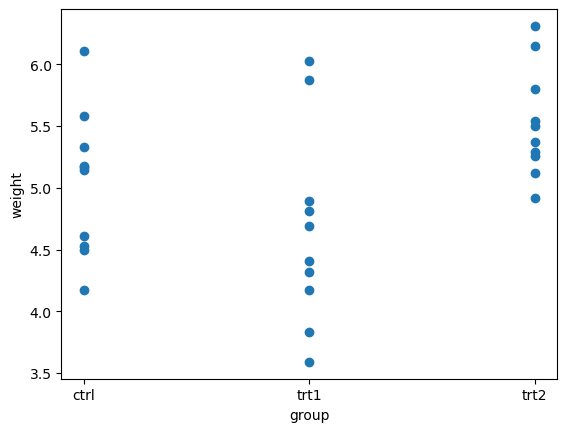

In [36]:
x =df['group']
y =df['weight']
plt.scatter(x, y)
plt.xlabel('group')
plt.ylabel('weight')
plt.show()

A boxplot displays the distribution of a continuous variable (weight) across different categories (group).
It shows the median, quartiles, and potential outliers for each group.
This helps us compare the central tendency and spread of weights across the control and treatment groups.

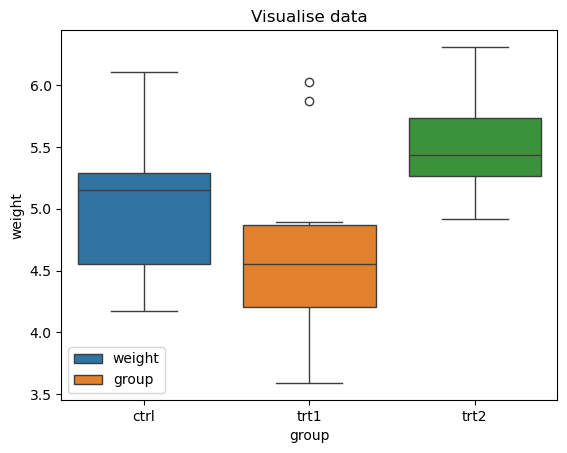

In [37]:
sns.boxplot(data=df, x = 'group', y = 'weight',hue="group" )
plt.title('Visualise data')
plt.xlabel('group')
plt.ylabel('weight')
plt.legend(['weight','group'])
plt.show()

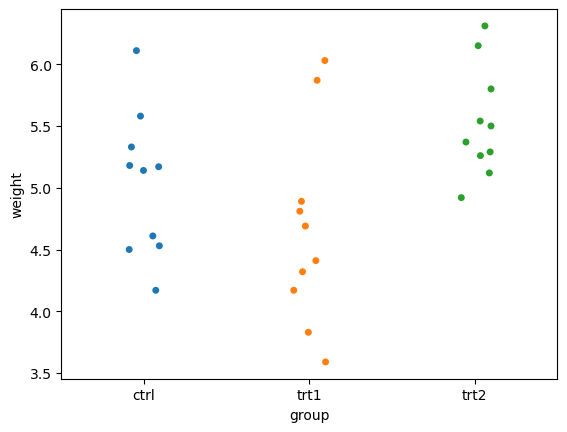

In [38]:
sns.stripplot(data=df, x = 'group', y = 'weight',hue="group" );

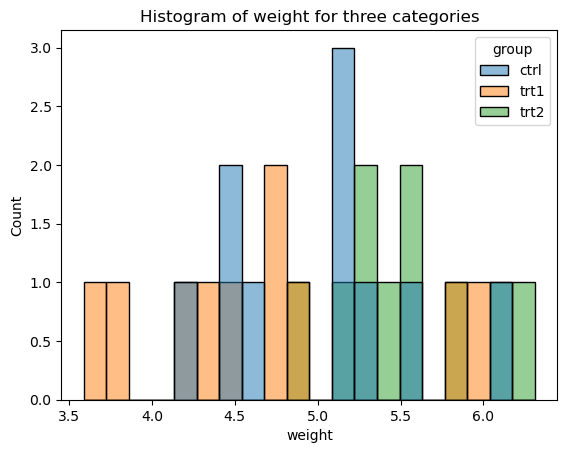

In [39]:
sns.histplot(data=df, x="weight", hue="group", bins=20)
plt.title("Histogram of weight for three categories")
plt.xlabel("weight")
plt.ylabel("Count")
#plt.legend
plt.show()

## Describe what a t-test is, how it works, and what the assumptions are.

### What is a t-test

A t-test is a statistical test used to compare the means of two groups to determine if they are significantly different from each other. It is commonly used in hypothesis testing to assess whether the observed differences between groups are due to chance or if they reflect true differences. The t test is one of the simplest statistical techniques that is used to evaluate whether there is a statistical difference between the means from up to two different samples. The t test is especially useful when you have a small number of sample observations (under 30 or so), and you want to make conclusions about the larger population. [2] The Ultimate Guide to T Tests, GraphPad, https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests

### how does a t-test work 
t tests make enough assumptions about your experiment to calculate an expected variability, and then they use that to determine if the observed data is statistically significant.  You can test the difference between these two groups using a t test and null and alterative hypotheses.

The null hypothesis (H0) is that the true difference between these group means is zero.
The alternate hypothesis (Ha) is that the true difference is different from zero. [3] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/

### Assumptions of a t-test

[3] An Introduction to t Tests | Definitions, Formula and Examples, Scribbr, https://www.scribbr.com/statistics/t-test/
-  Independence: The observations in each group must be independent of each other.
-  Normality: The data in each group should be approximately normally distributed.
-  Homogeneity of Variances: The variances of the two groups should be approximately equal.
-  Random Sampling: The data should be collected using a random sampling method.


The t-test statistic is calculated using the difference between the group means, the standard deviations, and the sample sizes.
Determine the p-value:

The p-value indicates the probability of observing the data, or something more extreme, if the null hypothesis is true.
Compare the p-value to the Significance Level ((\alpha)):

If the p-value is less than (\alpha) (commonly 0.05), reject the null hypothesis.



https://statisticsbyjim.com/hypothesis-testing/t-test/
A t test is a statistical hypothesis test that assesses sample means to draw conclusions about population means. Frequently, analysts use a t test to determine whether the population means for two groups are different. For example, it can determine whether the difference between the treatment and control group means is statistically significant.


The following are the standard t tests:

-  One-sample: Compares a sample mean to a reference value.
-  Two-sample: Compares two sample means.
-  Paired: Compares the means of matched pairs, such as before and after scores.


In [40]:
# code for t test

# Separate the data into two treatment groups: trt1 and trt2
trt1 = df[df.group == 'trt1']['weight']
trt2 = df[df.group == 'trt2']['weight']

# Perform a t-test to determine if there is a significant difference between the two treatment groups
t_stat, p_value = stats.ttest_ind(trt1, trt2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if the result is significant
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the two treatment groups (trt1 and trt2).")
else:
    print("There is no significant difference between the two treatment groups (trt1 and trt2).")

T-statistic: -3.0100985421243616
P-value: 0.0075184261182198574
There is a significant difference between the two treatment groups (trt1 and trt2).


In [41]:
stats.ttest_ind(trt1, trt2)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

# ANOVA
Anova stands for Analysis of Variance,
helps determine if the weights of plants in control grouop and two treatment gropus are significantly different

In [42]:
# Perform ANOVA
anova_result = stats.f_oneway(df[df['group'] == 'ctrl']['weight'],
                              df[df['group'] == 'trt1']['weight'],
                              df[df['group'] == 'trt2']['weight'])

# Print the results
print(f"ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

ANOVA result: F-statistic = 4.846087862380136, p-value = 0.0159099583256229


F-statistic = 4.846: This value represents the ratio of the variance between the groups to the variance within the groups. A higher F-statistic suggests that there is more variability between the group means than within the groups, which can indicate a significant difference between the groups.

#https://www.statology.org/anova-f-value-p-value/
The F-statistic is the ratio of the mean squares treatment to the mean squares error:

F-statistic: Mean Squares Treatment / Mean Squares Error

p-value = 0.0159: This value tells us the probability that the observed differences between the group means occurred by chance. In this case, the p-value is less than 0.05, which is a common threshold for statistical significance.

Interpretation:
Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference between the means of the three treatment groups (ctrl, trt1, and trt2). In other words, at least one of the treatment groups has a different mean weight compared to the others.

[1] PlantGrowth: Results from an Experiment on Plant Growth, rdrr, https://rdrr.io/r/datasets/PlantGrowth.html